In [10]:
!git clone https://github.com/jintn/facemask_keypoint.git

Cloning into 'facemask_keypoint'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 207 (delta 49), reused 183 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (207/207), 3.53 MiB | 21.02 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd facemask_keypoint/models/yolov5/
!pip install -r requirements.txt


/content/facemask_keypoint/models/yolov5


In [11]:
!pip install mediapipe opencv-python-headless

ERROR: Could not find a version that satisfies the requirement mediapipe==0.10.33 (from versions: 0.10.5, 0.10.7, 0.10.8, 0.10.9, 0.10.10, 0.10.11, 0.10.13, 0.10.14, 0.10.15, 0.10.18, 0.10.20, 0.10.21)
ERROR: No matching distribution found for mediapipe==0.10.33


In [28]:
# Run YOLOv5 detect.py script on your images (adjust the --source path as needed)
!python detect.py --weights /content/drive/MyDrive/Facemask_keypoint/Weights/exp2/weights/best.pt --source /content/drive/MyDrive/Facemask_keypoint/Data/images/train --conf 0.5 --save-txt --save-conf --project ../runs/detect --name exp

# After running, your detection outputs should be in '../runs/detect/exp'

detect: weights=['/content/drive/MyDrive/Facemask_keypoint/Weights/exp2/weights/best.pt'], source=/content/drive/MyDrive/Facemask_keypoint/Data/images/train, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2025-3-20 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/778 /content/drive/MyDrive/Facemask_keypoint/Data/images/train/maksssksksss1.png: 256x640 8 masks, 1 no mask, 30.9ms
image 2/778 /content/drive/MyDrive/Facemask_keypoint/Data/images/train/maksssksksss10.png: 640x512 1 mask, 31.2ms
image 

In [10]:
import cv2
import mediapipe as mp
print(mp.__version__)
import numpy as np
import matplotlib.pyplot as plt


# For inline plotting (if using Colab or Jupyter)
%matplotlib inline

# Initialize MediaPipe FaceMesh in static image mode
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

0.10.21


In [7]:
# Define paths to your image and label file
image_path = '/content/drive/MyDrive/Facemask_keypoint/Data/images/train/maksssksksss1.png'
label_file = '/content/facemask_keypoint/facemask_keypoint/models/runs/detect/exp6/labels/maksssksksss1.txt'

# Load image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

img_height, img_width = image.shape[:2]

# Read and parse the label file
detections = []
with open(label_file, 'r') as f:
    for line in f:
        # Each line: [class, x_center_norm, y_center_norm, width_norm, height_norm, confidence]
        values = list(map(float, line.strip().split()))
        detections.append(values)

print("Detections:", detections)

Detections: [[0.0, 0.765, 0.445513, 0.04, 0.134615, 0.7095], [0.0, 0.21, 0.541667, 0.06, 0.173077, 0.766373], [1.0, 0.2425, 0.464744, 0.08, 0.211538, 0.798152], [0.0, 0.08125, 0.532051, 0.0525, 0.128205, 0.798934], [0.0, 0.51625, 0.512821, 0.0675, 0.179487, 0.880754], [0.0, 0.95625, 0.541667, 0.0775, 0.173077, 0.894314], [0.0, 0.395, 0.605769, 0.075, 0.25, 0.907753], [0.0, 0.8375, 0.330128, 0.08, 0.224359, 0.931964], [0.0, 0.60875, 0.358974, 0.0875, 0.230769, 0.935295]]


In [8]:
def convert_yolo_to_pixels(yolo_line, img_w, img_h):
    """
    Convert a YOLO detection line to pixel coordinates.

    yolo_line: [class, x_center_norm, y_center_norm, width_norm, height_norm, confidence]
    Returns: (x1, y1, x2, y2, cls, conf) in pixel coordinates
    """
    cls, x_center, y_center, w_norm, h_norm, conf = yolo_line

    x_center_pix = x_center * img_w
    y_center_pix = y_center * img_h
    w_pix = w_norm * img_w
    h_pix = h_norm * img_h

    x1 = int(x_center_pix - w_pix / 2)
    y1 = int(y_center_pix - h_pix / 2)
    x2 = int(x_center_pix + w_pix / 2)
    y2 = int(y_center_pix + h_pix / 2)

    # Clip coordinates to image boundaries (optional)
    x1, y1 = max(x1, 0), max(y1, 0)
    x2, y2 = min(x2, img_w - 1), min(y2, img_h - 1)

    return (x1, y1, x2, y2, cls, conf)

Upscaled face crop from (16,20) to (128,160)
Processing detection with crop shape: (160, 128, 3) and dtype: uint8
Upscaled face crop from (24,27) to (128,144)
Processing detection with crop shape: (144, 128, 3) and dtype: uint8
Upscaled face crop from (32,33) to (128,132)
Processing detection with crop shape: (132, 128, 3) and dtype: uint8
Upscaled face crop from (21,20) to (134,128)
Processing detection with crop shape: (128, 134, 3) and dtype: uint8
Upscaled face crop from (27,28) to (128,132)
Processing detection with crop shape: (132, 128, 3) and dtype: uint8
Upscaled face crop from (31,27) to (146,128)
Processing detection with crop shape: (128, 146, 3) and dtype: uint8
Upscaled face crop from (30,39) to (128,166)
Processing detection with crop shape: (166, 128, 3) and dtype: uint8
Upscaled face crop from (32,35) to (128,140)
Processing detection with crop shape: (140, 128, 3) and dtype: uint8
Upscaled face crop from (35,36) to (128,131)
Processing detection with crop shape: (131,

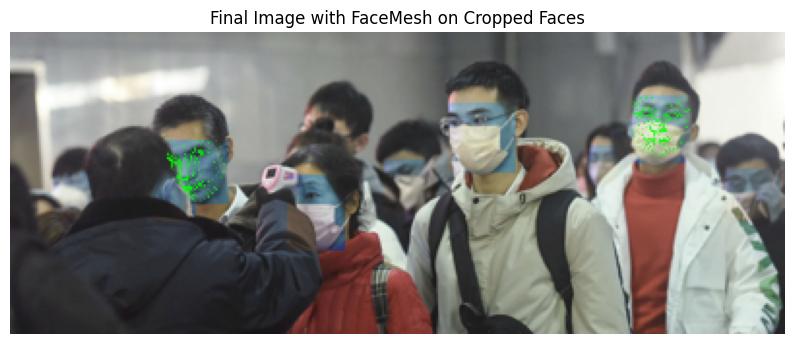

In [12]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize the older FaceMesh API in static image mode.
face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

MIN_SIZE = 128  # Minimum size for upscaling small face crops

# 'image' is your original image loaded without overlays.
results_image = image.copy()
face_count = 0

for det in detections:
    x1, y1, x2, y2, cls, conf = convert_yolo_to_pixels(det, img_width, img_height)

    # (Optional) Filtering: Uncomment if desired.
    # if conf < 0.5:
    #     continue
    # if cls != 0:
    #     continue

    # Crop the face region from the original image
    face_crop = image[y1:y2, x1:x2].copy()

    # Skip if crop is empty or extremely small
    if face_crop.size == 0 or face_crop.shape[0] < 10 or face_crop.shape[1] < 10:
        print("Skipping a detection due to extremely small crop size.")
        continue

    # Convert cropped region from BGR to RGB
    rgb_face = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
    # Ensure the array is contiguous
    rgb_face = np.ascontiguousarray(rgb_face, dtype=np.uint8)

    # Upscale if needed so that both dimensions are at least MIN_SIZE
    h, w = rgb_face.shape[:2]
    if h < MIN_SIZE or w < MIN_SIZE:
        scale = max(MIN_SIZE / h, MIN_SIZE / w)
        new_w = int(w * scale)
        new_h = int(h * scale)
        rgb_face = cv2.resize(rgb_face, (new_w, new_h))
        print(f"Upscaled face crop from ({w},{h}) to ({new_w},{new_h})")

    print("Processing detection with crop shape:", rgb_face.shape, "and dtype:", rgb_face.dtype)

    try:
        # Process the upscaled face crop using the older API.
        mesh_results = face_mesh.process(rgb_face.copy())
    except Exception as e:
        print("Error processing face crop:", e)
        continue

    # If landmarks are detected, draw them on the upscaled crop.
    if mesh_results.multi_face_landmarks:
        for face_landmarks in mesh_results.multi_face_landmarks:
            fh, fw, _ = rgb_face.shape
            for lm in face_landmarks.landmark:
                cx, cy = int(lm.x * fw), int(lm.y * fh)
                cv2.circle(rgb_face, (cx, cy), 1, (0, 255, 0), -1)

    # Downscale the processed face back to the original bounding box size.
    processed_face = cv2.resize(rgb_face, (x2 - x1, y2 - y1))
    results_image[y1:y2, x1:x2] = processed_face
    face_count += 1

print(f"Processed {face_count} faces.")

# Display the final result.
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image with FaceMesh on Cropped Faces')
plt.axis('off')
plt.show()